In [16]:
import re
import subprocess
import os

import matplotlib.pyplot as plt
import numpy as np

In [17]:
files = ["ivp_vae_biclass_eicu_r5_initialize_resnetflow_True_False_missing_dr80.log",
         "red_vae_biclass_eicu_r3_initialize_resnetflow_True_missing_dr20.log"]

randn_seed = 5

path_log = "/home/xiao/project/leit/log/"

list_results = []
for file in files:
    dict_mse = {i: [] for i in range(10, 100, 10)}
    reg_obj_dr = re.search("_dr(\d+)", file)
    reg_obj_randn = re.search("_r(\d+)_", file)
    for rs in range(1, randn_seed+1):
        for dr in dict_mse.keys():
            file_i = file[:reg_obj_dr.start()+3] + str(dr) + file[reg_obj_dr.end():]
            file_i = file_i[:reg_obj_randn.start()+2] + str(rs) + file_i[reg_obj_randn.end()-1:]
            if os.path.exists(path_log + file_i):
                lines = str(subprocess.check_output(['tail', path_log + file_i]))
                obj_mse = re.search("test_auroc=([\d.]*\d+)", lines)
                if obj_mse is not None:
                    mse = float(obj_mse.group(1))
                    dict_mse[dr].append(mse)
    list_results.append(dict_mse.copy())
    print(file)
    print(dict_mse)
    print()

ivp_vae_biclass_eicu_r5_initialize_resnetflow_True_False_missing_dr80.log
{10: [0.80002, 0.77474, 0.78945, 0.79336, 0.77288], 20: [0.79371, 0.76968, 0.79096, 0.79345, 0.76705], 30: [0.79305, 0.77339, 0.796, 0.78254, 0.75861], 40: [0.78975, 0.78829, 0.7917, 0.78371, 0.75228], 50: [0.79415, 0.76686, 0.78487, 0.77638, 0.75291], 60: [0.78734, 0.76327, 0.76392, 0.7842, 0.75994], 70: [0.79754, 0.76103, 0.7714, 0.77887, 0.74279], 80: [0.77901, 0.744, 0.77498, 0.75853, 0.7276], 90: [0.74612, 0.71813, 0.73803, 0.75233, 0.68806]}

red_vae_biclass_eicu_r3_initialize_resnetflow_True_missing_dr20.log
{10: [0.7794, 0.76774, 0.79632, 0.79653, 0.7419], 20: [0.7831, 0.76522, 0.79466, 0.79043, 0.74345], 30: [0.77742, 0.77009, 0.7954, 0.78717, 0.74324], 40: [0.77967, 0.76386, 0.79107, 0.78281, 0.74584], 50: [0.77032, 0.76239, 0.7857, 0.78472, 0.74278], 60: [0.77958, 0.75975, 0.77445, 0.77842, 0.74575], 70: [0.78938, 0.75139, 0.7775, 0.77509, 0.7251], 80: [0.77325, 0.72932, 0.77084, 0.7501, 0.70682], 90: 

[10, 20, 30, 40, 50, 60, 70, 80, 90]
[0.78609, 0.78297, 0.780718, 0.781146, 0.775034, 0.7717339999999999, 0.770326, 0.7568239999999999, 0.728534]

[10, 20, 30, 40, 50, 60, 70, 80, 90]
[0.776378, 0.775372, 0.774664, 0.77265, 0.769182, 0.76759, 0.763692, 0.746066, 0.72393]



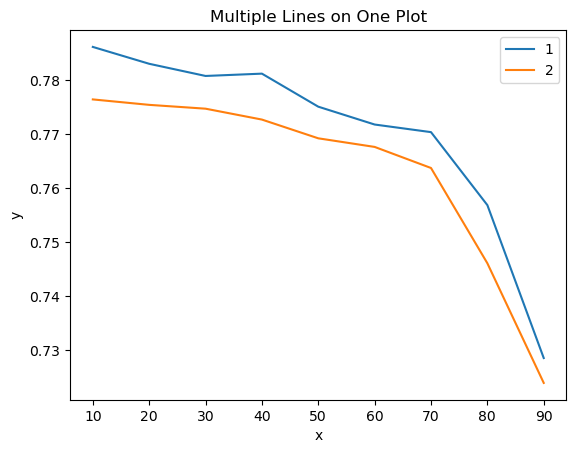

In [18]:
cnt = 1
for dm in list_results:
    x = []
    y = []
    for e in dm.keys():
        if dm[e] != []:
            y.append(np.mean(dm[e]))
            x.append(e)
    print(x)
    print(y)
    print()
    plt.plot(x, y, label=cnt)
    cnt += 1
    
plt.xlabel('x')
plt.ylabel('y')
plt.title('Multiple Lines on One Plot')

# Add a legend and display the plot
plt.legend()
plt.show()